In [1]:

# Simple CNN model for CIFAR-10
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical

170498071/170498071 [==============================] - 6s 0us/step


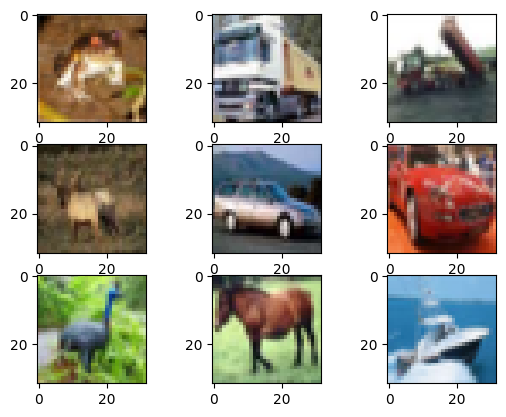

In [2]:
# Plot ad hoc CIFAR10 instances
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
 plt.subplot(330 + 1 + i)
 plt.imshow(X_train[i])
# show the plot
plt.show()

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
import tensorflow as tf
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

**Convolution Neural Network:**
number of layer and filters are set on the bases of Cms_id. Below is the archtecture of my CNN.

In [6]:
...
# Create the model
model = Sequential()
# My CMSID is 400363 * 7.8 = 3122832
bold_text = "\033[1m"
cms_id = "CMS ID 3122832"
print(bold_text + cms_id + "\033[0m")

model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(12, (1, 1), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
# As we haveto use odd filtersize soi have added 2+1=3
model.add(Conv2D(12, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(Conv2D(12, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
# As we haveto use odd filtersize soi have added 8+1=9
model.add(Conv2D(12, (9, 9), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(Conv2D(12, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
# As we haveto use odd filtersize soi have added 2+1=3
model.add(Conv2D(12, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = tf.keras.optimizers.legacy.SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

CMS ID 3122832
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 12)        396       
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 12)        1308      
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 12)        1308      
                                         

In [7]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=50)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/25
1000/1000 [==============================] - 19s 8ms/step - loss: 1.8958 - accuracy: 0.3014 - val_loss: 1.5456 - val_accuracy: 0.4333
Epoch 2/25
1000/1000 [==============================] - 6s 6ms/step - loss: 1.5328 - accuracy: 0.4427 - val_loss: 1.3981 - val_accuracy: 0.4922
Epoch 3/25
1000/1000 [==============================] - 8s 8ms/step - loss: 1.4057 - accuracy: 0.4902 - val_loss: 1.3300 - val_accuracy: 0.5195
Epoch 4/25
1000/1000 [==============================] - 7s 7ms/step - loss: 1.3168 - accuracy: 0.5250 - val_loss: 1.2880 - val_accuracy: 0.5293
Epoch 5/25
1000/1000 [==============================] - 7s 7ms/step - loss: 1.2597 - accuracy: 0.5448 - val_loss: 1.2389 - val_accuracy: 0.5535
Epoch 6/25
1000/1000 [==============================] - 7s 7ms/step - loss: 1.2100 - accuracy: 0.5636 - val_loss: 1.2209 - val_accuracy: 0.5590
Epoch 7/25
1000/1000 [==============================] - 8s 8ms/step - loss: 1.1695 - accuracy: 0.5791 - val_loss: 1.1866 - val_accuracy

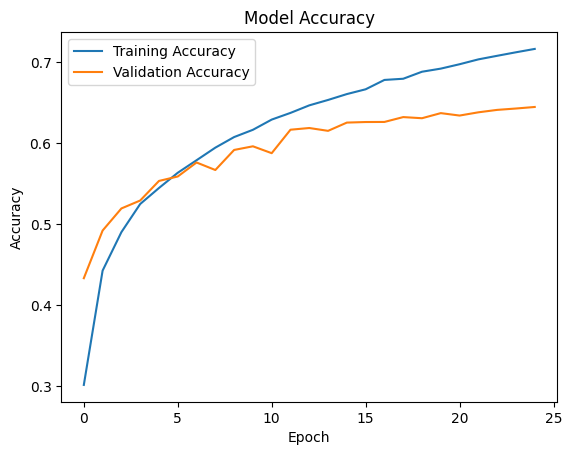

Accuracy: 64.49%


In [8]:
# Plot accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))